| **Chapter**                   | 2:  Simple compartmental models |
| ----------------------------- |---------------------------------|
| **Computational Note**        | 2.12: Estimating $R_t$          |
| **Package prerequisites**     | None                            |


# Estimating $R_t$ of COVID-19 in the United States

Harvey and Kattuman[^1] present a very convenient way of empirically ascertain $R_t$:


$$
    \hat{R}_{k, \tau, t} = \frac{
        \sum_{j = 0}^{k - 1} y_{t - j}
    }{
        \sum_{j = 0}^{k - 1} y_{t-\tau-j}
    } 
$$

where $\tau$ is the mean duration of infectiousness and $j$ is a smoothing factor. 

We can this in computational terms: $R_t$ (i.e. at time $t$) is the fraction of the $j$-day rolling sum at time $t$ and the $j$-day rolling sum at time $t - \tau$.

We will adopt $\tau = 4$, which has been used for COVID-19 by the RKI,[^1] and choose a 7-day smoothing ($j = 7$) to compensate for weekly discrepancies in reporting and presentation.

The data set used in this example is derived from Our World In Data.[^2]

[^1]: Harvey, A. and Kattuman, P., 2021. A farewell to R: time-series models for tracking and forecasting epidemics. *Journal of the Royal Society Interface*, **18**(182), p.20210179.

[^2]: Hannah Ritchie, Edouard Mathieu, Lucas Rodés-Guirao, Cameron Appel, Charlie Giattino, Esteban Ortiz-Ospina, Joe Hasell, Bobbie Macdonald, Diana Beltekian and Max Roser (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]

In [1]:
import pandas as pd
from matplotlib import pyplot as plt, gridspec
import seaborn as sns

sns.set_style("darkgrid")

In [3]:
%load_ext watermark
%watermark --iversions -v -a "Chris von Csefalvay" -gu "chrisvoncsefalvay"

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Chris von Csefalvay

Github username: chrisvoncsefalvay

Python implementation: CPython
Python version       : 3.10.2
IPython version      : 8.4.0

seaborn   : 0.11.2
matplotlib: 3.5.2
pandas    : 1.4.2



## Loading the OWID data set and filtering for US cases

In [4]:
covid = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")[["location", "date", "new_cases"]]
covid = covid[covid["location"] == "United States"]

## Calculating rolling sum and shifted rolling sum components

In [5]:
covid["7ma"] = covid.new_cases.rolling(7).sum()
covid["7ma_tau"] = covid["7ma"].shift(4)

## Calculating $R_t$

In [6]:
covid["Rt"] = covid["7ma"]/covid["7ma_tau"]

## Plotting

In [7]:
covid["date"] = pd.to_datetime(covid["date"])

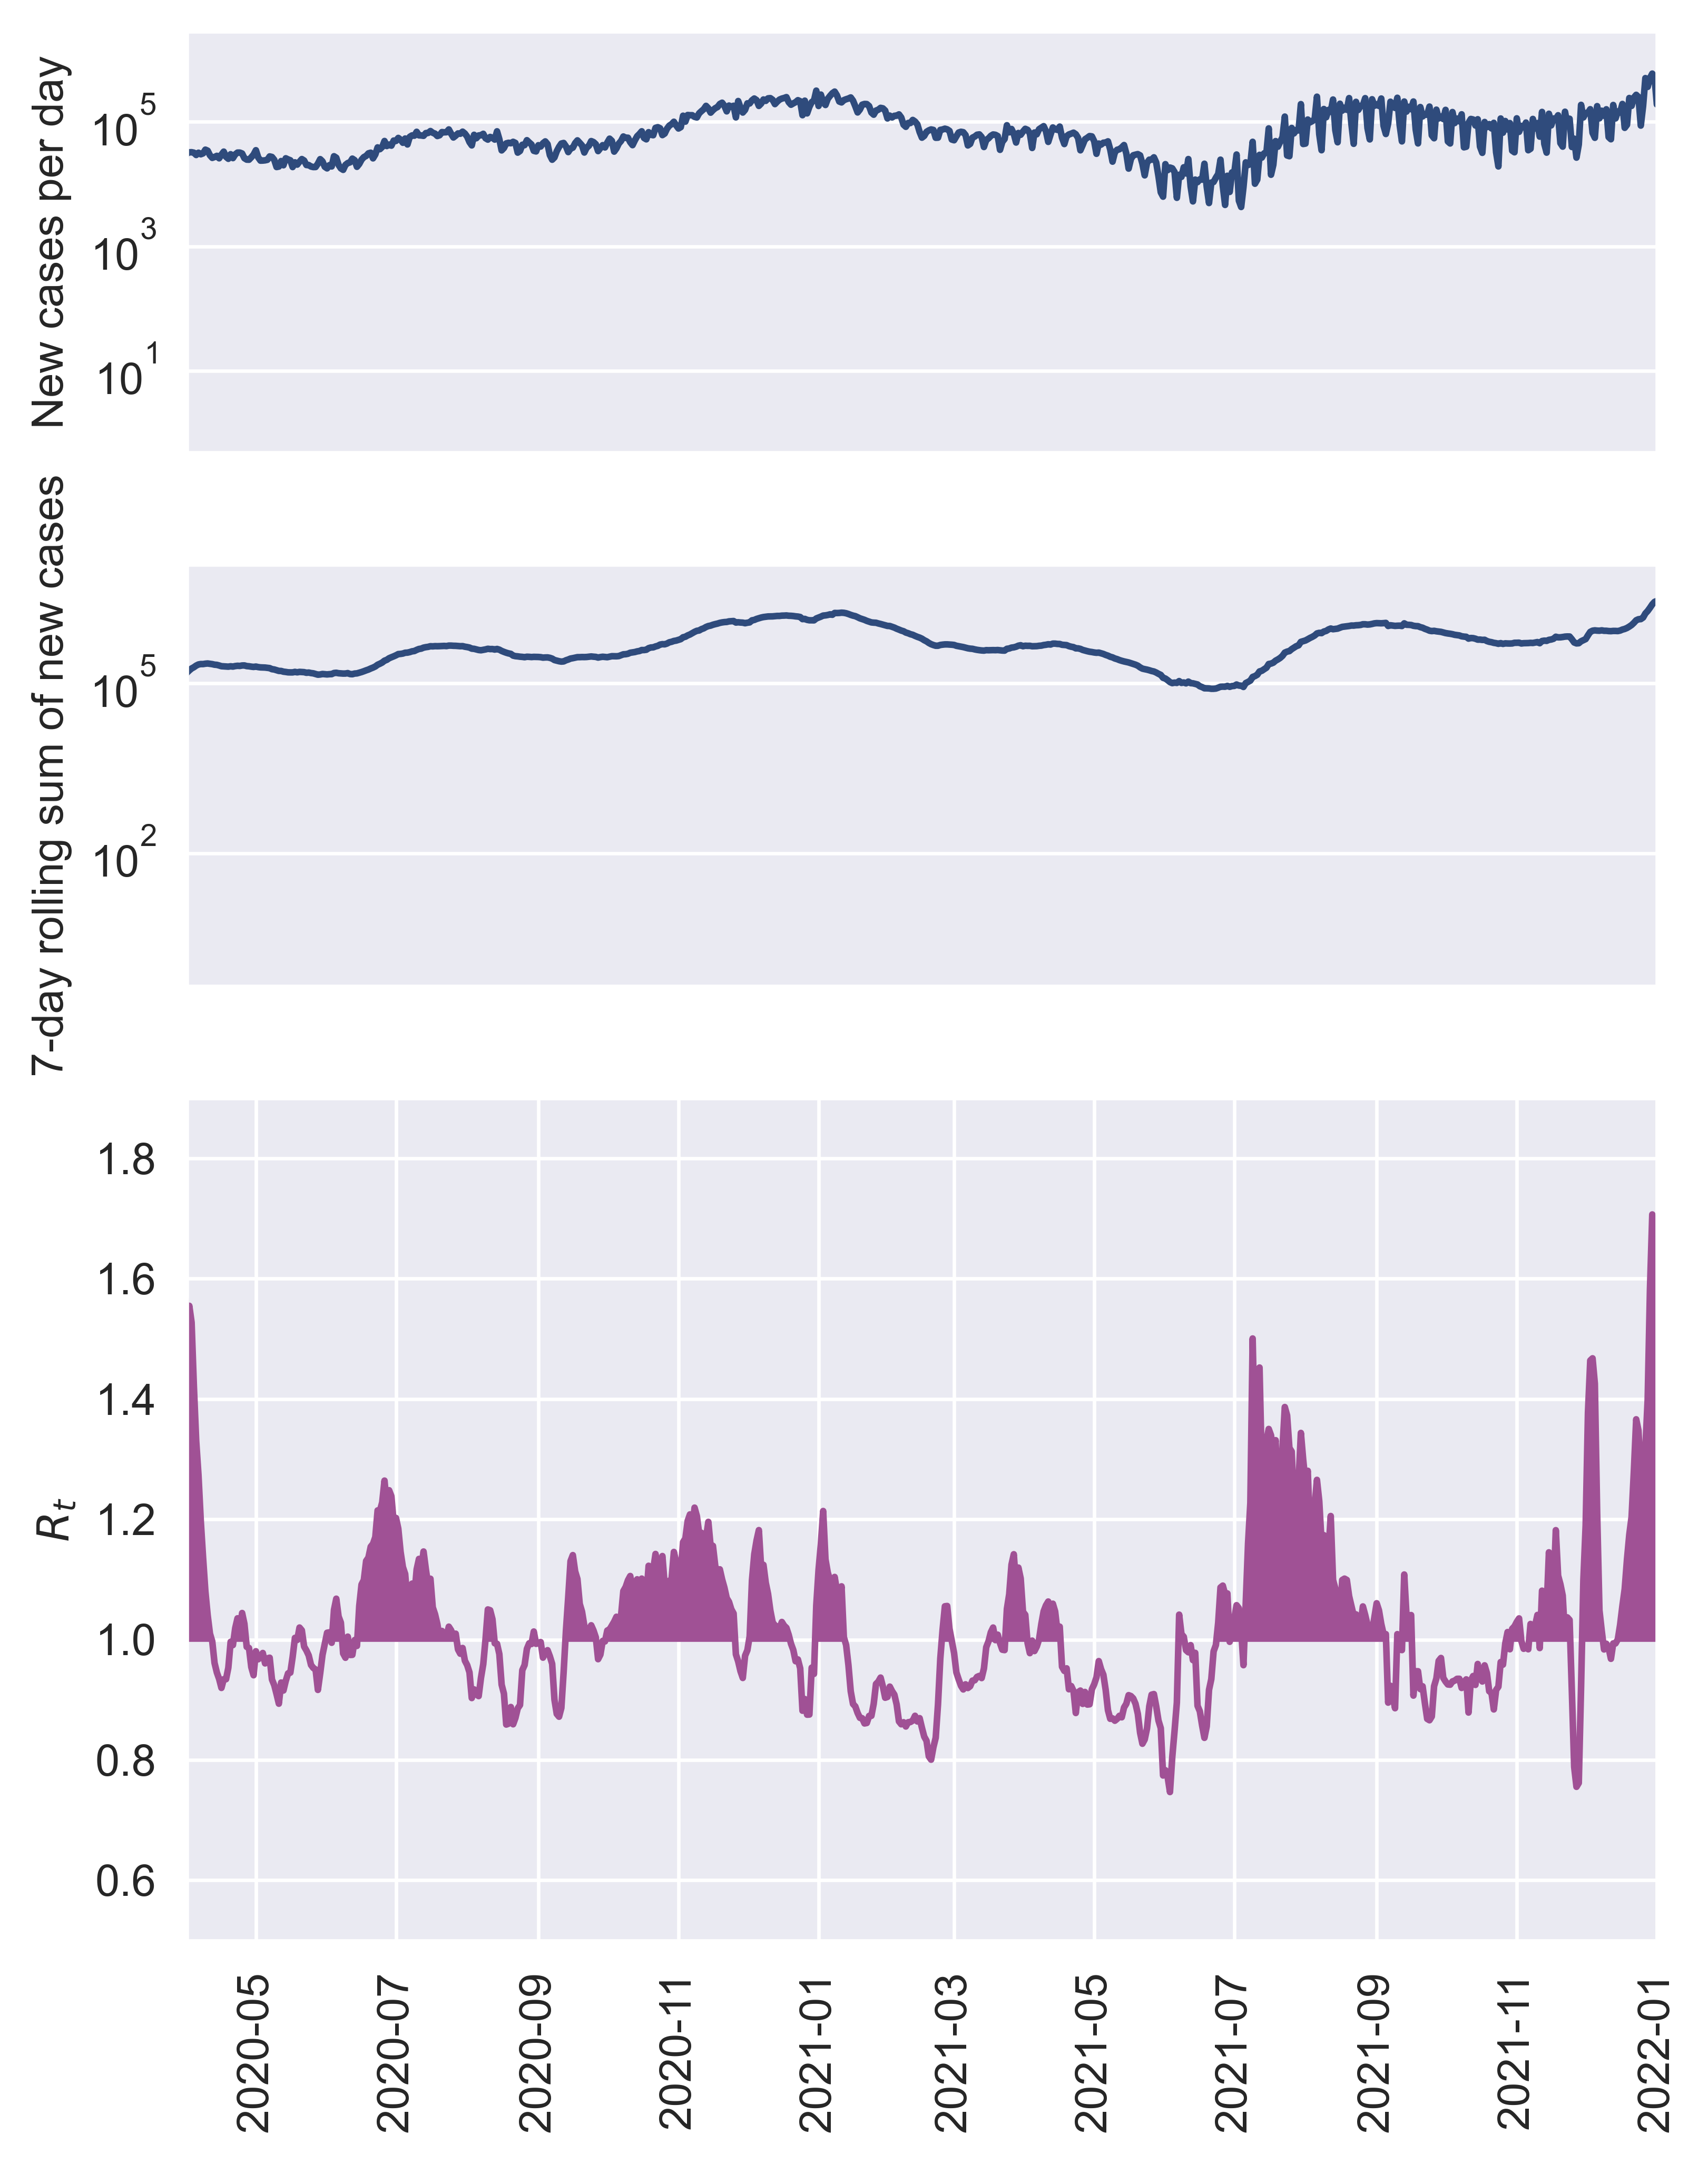

In [8]:
fig = plt.figure(figsize=(6, 8), dpi=600)

gs = gridspec.GridSpec(3, 1, height_ratios=[1,1,2])
gs.update(hspace=0.2)

ax1 = plt.subplot(gs[0])
ax1.plot(covid.date, covid.new_cases, color="#2f4b7c")
ax1.set_yscale("log")
ax1.set_xlim(pd.to_datetime("2020-04-01"), pd.to_datetime("2022-01-01"))
ax1.set_ylabel("New cases per day")
ax1.xaxis.set_visible(False)

ax2 = plt.subplot(gs[1])
ax2.plot(covid.date, covid["7ma"], color="#2f4b7c")
ax2.set_yscale("log")
ax2.set_xlim(pd.to_datetime("2020-04-01"), pd.to_datetime("2022-01-01"))
ax2.set_ylabel("7-day rolling sum of new cases")
ax2.xaxis.set_visible(False)

ax3 = plt.subplot(gs[2])
ax3.plot(covid.date, covid.Rt, color="#a05195")
ax3.set_xlim(pd.to_datetime("2020-04-01"), pd.to_datetime("2022-01-01"))
ax3.set_ylim(0.5, 1.9)
ax3.fill_between(covid.date, 1, covid.Rt, color="#a05195", where=covid.Rt>=1.0)
ax3.set_ylabel("$R_t$")
plt.xticks(rotation=90)

plt.savefig("rt_covid.pdf")